<a href="https://colab.research.google.com/github/ollin02/Numpy/blob/main/Desafio_Conociendo_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Haga lo que hicimos

Ha llegado el momento de poner a prueba los conocimientos adquiridos durante la lección. Para ello, vamos a utilizar otro conjunto de datos en un desafío que se desarrollará a lo largo del curso. Este conjunto de datos es una versión modificada del archivo disponible en el sitio de Kaggle. Por lo tanto, utilizaremos el archivo raw disponible en Github.

En esta etapa, debes cargar los datos. Para hacerlo, importa NumPy y utiliza la función loadtxt. Utiliza el enlace de la URL y el parámetro usecols para omitir la primera columna. Puedes usar np.arange para crear la secuencia de números que representan las columnas. Por último, también es necesario incluir el parámetro skiprows=1 para que la primera línea de texto se omita al leer el archivo.

In [9]:
import numpy as np

url = 'https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv'

datos = np.loadtxt(url, delimiter=',', usecols=np.arange(1, 6), skiprows=1)
print(datos)


[[  2.96  86.76 172.    85.     2.  ]
 [  3.91  88.05 166.    78.     3.  ]
 [  4.42  95.17 156.    81.     2.  ]
 ...
 [ 15.59 256.5  168.    82.    20.  ]
 [ 15.92 260.14 142.    72.    11.  ]
 [ 16.45 261.51 152.    74.     2.  ]]


Se utiliza np.arange() dentro de np.loadtxt() para crear una secuencia de columnas.

##**Desafio-Análisis-númerico-eficiente-con-Python**

Ha llegado el momento de poner a prueba los conocimientos adquiridos durante la lección. Continuando con el proyecto de las naranjas/toronjas, ahora debes seleccionar parte de los datos. Las columnas que evaluaremos son el diámetro y el peso. Crea arrays específicos para almacenar el diámetro y el peso de la naranja y la toronja. El diámetro está en la columna cero y el peso en la columna uno. Los datos de las naranjas van hasta la fila 4999 y los datos de las toronjas comienzan en la fila 5000 del archivo.

Después de seleccionar los datos, importa la biblioteca matplotlib y crea un gráfico para el peso en función del diámetro tanto para las naranjas como para las toronjas.

In [10]:
#Creo un array para el diametro de naranjas y toronjas
diametro_naranjas = datos[:5000, 0]
diametro_toronjas = datos[5000:, 0]

In [11]:
#Creo un array para el peso de las naranjas y de las toronjas
peso_naranjas = datos[:5000, 1]
peso_toronjas = datos[5000:, 1]

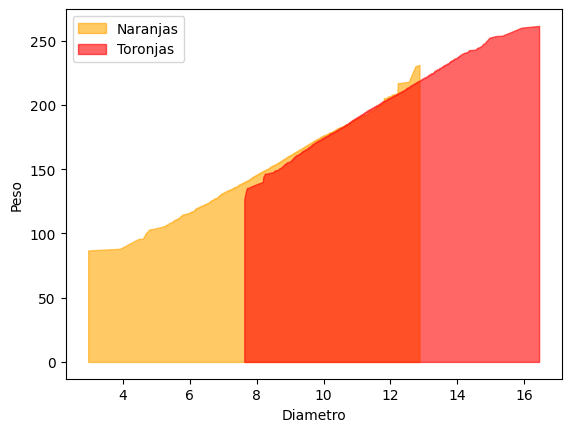

In [13]:
import matplotlib.pyplot as plt

plt.fill_between(diametro_naranjas, peso_naranjas, color='orange', label='Naranjas', alpha=0.6)
plt.fill_between(diametro_toronjas, peso_toronjas, color='red', label='Toronjas', alpha=0.6)
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.legend()
plt.show()

Ha llegado el momento de poner a prueba los conocimientos adquiridos durante la lección. Continuando con el proyecto de las naranjas/toronjas, ahora debes calcular el coeficiente angular y lineal para la recta de las naranjas y para la recta de las toronjas. Utiliza la fórmula de mínimos cuadrados para encontrar cada uno.

$$\alpha = pendiente$$
$$\beta = interseccion$$
$$n = observaciones$$
$$y = diametro$$
$$x = Peso$$


La solución para la pendiente es:

$$\alpha = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2} $$

Y para la intersección:
 $$\beta = \frac{\sum y - \alpha \sum x}{n} $$

Y obtenemos la ecuación de la recta:

$$y = \alpha x + \beta $$

## Naranjas

In [14]:
n = np.size(diametro_naranjas)
y = peso_naranjas
x = diametro_naranjas

In [15]:
a = (n*np.sum(x*y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - np.sum(x)**2)

In [16]:
b = (np.sum(y) - a*np.sum(x))/n

In [17]:
print(f'La pendiente es: {a} \nLa ordenada al origen es: {b}')

La pendiente es: 14.7997452319846 
La ordenada al origen es: 27.385603812184137


In [18]:
y = a*x + b

In [19]:
y

array([ 71.1928497 ,  85.25260767,  92.80047774, ..., 213.12240647,
       216.08235552, 217.85832495])

In [20]:
np.linalg.norm(peso_naranjas - y)

np.float64(46.32284523962459)

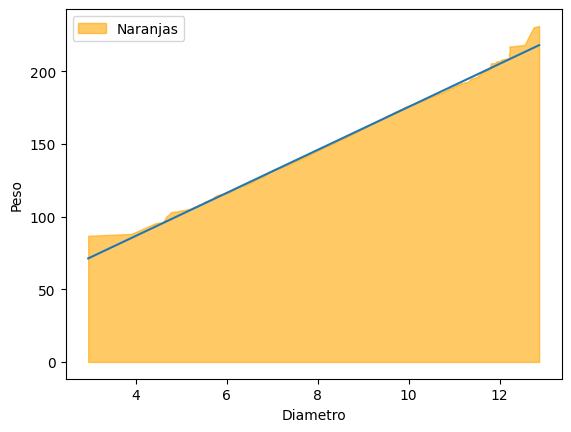

In [22]:
plt.fill_between(diametro_naranjas, peso_naranjas, color='orange', label='Naranjas', alpha=0.6)
plt.plot(x,y)
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Toronjas

In [41]:
m = np.size(diametro_toronjas)
w = peso_toronjas
z = diametro_toronjas

In [42]:
c = (m*np.sum(w*z) - np.sum(w)*np.sum(z))/(m*np.sum(w**2) - np.sum(w)**2)

In [43]:
d = (np.sum(z) - c*np.sum(w))/m

In [44]:
print(f'La pendiente es: {c} \nLa ordenada al origen es: {d}')

La pendiente es: 0.06358962719434202 
La ordenada al origen es: -1.0690753104473625


In [45]:
z = c*w + d

In [46]:
z

array([ 6.99345352,  7.45066294,  7.55113455, ..., 15.24166406,
       15.47313031, 15.5602481 ])

In [47]:
np.linalg.norm(peso_toronjas - z)

np.float64(13200.742596840015)

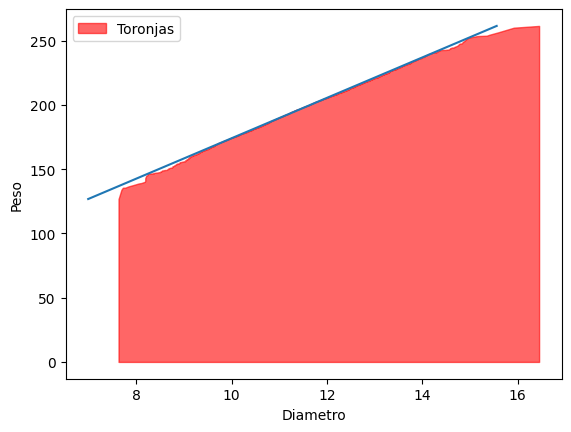

In [50]:
plt.fill_between(diametro_toronjas, peso_toronjas, color='red', label='Toronjas', alpha=0.6)
plt.plot(z,w)
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.legend()
plt.show()

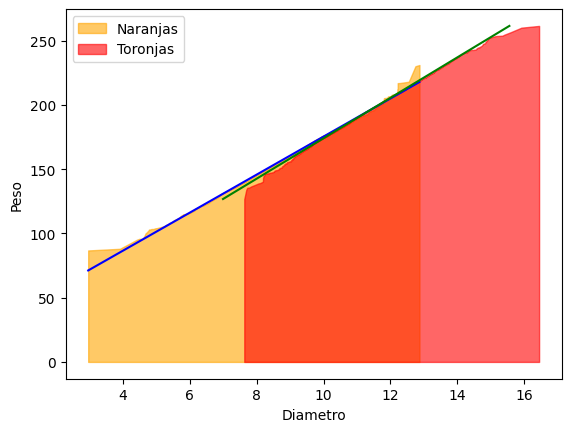

In [53]:
plt.fill_between(diametro_naranjas, peso_naranjas, color='orange', label='Naranjas', alpha=0.6)
plt.fill_between(diametro_toronjas, peso_toronjas, color='red', label='Toronjas', alpha=0.6)
plt.plot(x,y, color='blue')
plt.plot(z,w, color='green')
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.legend()
plt.show()

# Diferencia en un intervalo

Patty es una científica que está analizando una base de datos. Está utilizando la biblioteca NumPy para evaluar las columnas de una matriz de datos de un sensor de calor. Cada columna representa la misma información recopilada por un mismo sensor en momentos diferentes. Para validar si el sensor sigue calibrado, necesita que la diferencia entre los valores en las posiciones de una matriz llamada "base" y una columna de la matriz "medidas" sea menor que 0.01.

¿Cómo puede usar NumPy para realizar esta evaluación en la columna cero de la matriz?

np.allclose(base, medidas[:, 0], 0.01)

##Determinando el número de NaNs

Estás trabajando con datos de ventas de tu puesto de jugo de limón. Cargaste los datos con load.txt() y, al visualizar la matriz, notaste que había algunos NaNs dentro de ella. Dado que se trata de un archivo grande, decidiste usar código para verificar el número total de estos valores. ¿Cuál es el código adecuado para obtener el resultado deseado en la matriz jugo_de_limon?

np.sum(np.isnan(jugo_de_limon))